In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('C:/Users/lenovo/python_code/house.csv')
data.head(22)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,country
0,7129300520,2014/10/13,221900,3,1.00,1180,5650,1.0,USA
1,6414100192,2014/10/14,538000,3,2.25,2570,7242,2.0,USA
2,5631500400,2014/10/15,180000,2,1.00,770,10000,1.0,USA
3,2487200875,2014/10/16,604000,4,3.00,1960,5000,1.0,USA
4,1954400510,2014/10/17,510000,3,2.00,1680,8080,1.0,USA
5,7237550310,2014/10/18,1225000,4,4.50,5420,101930,1.0,USA
6,1321400060,2014/10/19,257500,3,2.25,1715,6819,2.0,USA
7,2008000270,2014/10/20,291850,3,1.50,1060,9711,1.0,USA
8,2414600126,2014/10/21,229500,3,1.00,1780,7470,1.0,USA
9,3793500160,2014/10/22,323000,3,2.50,1890,6560,2.0,USA


Linear Regression

Draw a scatter plot

In [3]:
data['date'] = pd.to_datetime(data['date'],format = "%Y-%m-%d")

In [4]:
data = data.set_index('id')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,country
id,,,,,,,,
7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,USA
6414100192,2014-10-14,538000,3,2.25,2570,7242,2.0,USA
5631500400,2014-10-15,180000,2,1.00,770,10000,1.0,USA
2487200875,2014-10-16,604000,4,3.00,1960,5000,1.0,USA
1954400510,2014-10-17,510000,3,2.00,1680,8080,1.0,USA


In [5]:
x = data['sqft_living']
x.head(20)

id
7129300520    1180
6414100192    2570
5631500400     770
2487200875    1960
1954400510    1680
7237550310    5420
1321400060    1715
2008000270    1060
2414600126    1780
3793500160    1890
1736800520    3560
9212900260    1160
114101516     1430
6054650070    1370
1175000570    1810
9297300055    2950
1875500060    1890
6865200140    1600
16000397      1200
7983200060    1250
Name: sqft_living, dtype: int64

In [6]:
y = data['price']
y.head(20)

id
7129300520     221900
6414100192     538000
5631500400     180000
2487200875     604000
1954400510     510000
7237550310    1225000
1321400060     257500
2008000270     291850
2414600126     229500
3793500160     323000
1736800520     662500
9212900260     468000
114101516      310000
6054650070     400000
1175000570     530000
9297300055     650000
1875500060     395000
6865200140     485000
16000397       189000
7983200060     230000
Name: price, dtype: int64

In [7]:
plt.scatter(x,y,color = "gray")

In [8]:
plt.xlabel("living area")
plt.ylabel("housing price")

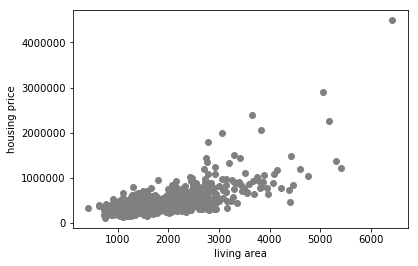

In [9]:
plt.show()

Correlation coefficient

In [10]:
examDf = DataFrame(data)
examDf.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,country
id,,,,,,,,
7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,USA
6414100192,2014-10-14,538000,3,2.25,2570,7242,2.0,USA
5631500400,2014-10-15,180000,2,1.00,770,10000,1.0,USA
2487200875,2014-10-16,604000,4,3.00,1960,5000,1.0,USA
1954400510,2014-10-17,510000,3,2.00,1680,8080,1.0,USA


In [11]:
rdf = examDf.corr()
print(rdf)

                price  bedrooms  bathrooms  sqft_living  sqft_lot    floors
price        1.000000  0.275413   0.435848     0.673718  0.122701  0.245434
bedrooms     0.275413  1.000000   0.510190     0.568625  0.026233  0.205463
bathrooms    0.435848  0.510190   1.000000     0.731642  0.129410  0.496290
sqft_living  0.673718  0.568625   0.731642     1.000000  0.239292  0.365944
sqft_lot     0.122701  0.026233   0.129410     0.239292  1.000000  0.043262
floors       0.245434  0.205463   0.496290     0.365944  0.043262  1.000000


split train set and test set

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,train_size=0.8)

In [13]:
print("Independent Variables:",x.shape,";  train sets:",X_train.shape,":    test sets:",X_test.shape)
print("Dependent Variables:",y.shape,";  train sets:",Y_train.shape,":    test sets:",Y_test.shape)

Independent Variables: (499,) ;  train sets: (399,) :    test sets: (100,)
Dependent Variables: (499,) ;  train sets: (399,) :    test sets: (100,)


scatter plots

In [14]:
plt.scatter(X_train,Y_train,color="darkgreen",label = "train data")
plt.scatter(X_test,Y_test,color="red",label = "test data")

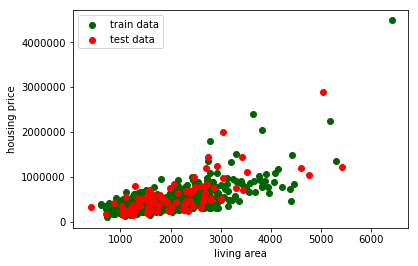

In [15]:
plt.legend(loc=2)#Second quadrant
plt.xlabel("living area")
plt.ylabel("housing price")
plt.show()

In [16]:
model = LinearRegression()

Linear Regression Training

In [17]:
X_train = X_train.values.reshape(-1,1)

In [18]:
X_test = X_test.values.reshape(-1,1)

In [19]:
Y_train = Y_train.values.reshape(-1,1)
Y_test = Y_test.values.reshape(-1,1)

In [20]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
a = model.intercept_ 
b = model.coef_

In [22]:
y_train_pred = model.predict(X_train)

In [23]:
y_test_pred = model.predict(X_test)
plt.plot(X_test,y_test_pred,color="blue",linewidth=2,label="best line")

predict training data

testing data scatter plot

In [24]:
plt.scatter(X_train,Y_train,color="darkgreen",label="train data")
plt.scatter(X_test,Y_test,color="red",label="test data")

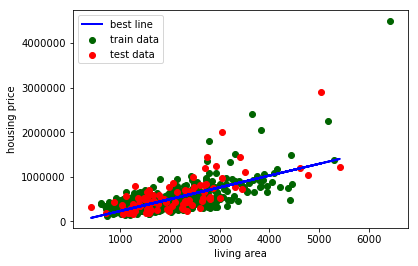

In [25]:
plt.legend(loc=2)
plt.xlabel("living area")
plt.ylabel("housing price")
plt.show()

In [26]:
print("intercept",a,"coefficient",b)
print("best line Y=",np.round(a,2),"+",np.round(b[0],2),"* x")

intercept [-30676.88162836] coefficient [[ 264.07936283]]
best line Y= [-30676.88] + [ 264.08] * x


In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [28]:
y_test_pred = model.predict(X_test)

In [29]:
mse = mean_squared_error(Y_test, y_test_pred)
print(mse)

81904237566.7


In [30]:
rmse = np.sqrt(mse)
print(rmse)

286189.163958


In [31]:
mean_absolute_error(Y_test,y_test_pred)

182558.08206381032

In [32]:
r2_score(Y_test,y_test_pred)

0.48624266628022339

cross_validation

In [33]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
print(knn.score(X_train,Y_train))

0.210526315789


Multivariate Linear Regression

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
data = pd.read_csv('C:/Users/lenovo/python_code/house.csv')
examDf = DataFrame(data)

In [38]:
examDf.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,country
0,7129300520,2014/10/13,221900,3,1.00,1180,5650,1.0,USA
1,6414100192,2014/10/14,538000,3,2.25,2570,7242,2.0,USA
2,5631500400,2014/10/15,180000,2,1.00,770,10000,1.0,USA
3,2487200875,2014/10/16,604000,4,3.00,1960,5000,1.0,USA
4,1954400510,2014/10/17,510000,3,2.00,1680,8080,1.0,USA
5,7237550310,2014/10/18,1225000,4,4.50,5420,101930,1.0,USA
6,1321400060,2014/10/19,257500,3,2.25,1715,6819,2.0,USA
7,2008000270,2014/10/20,291850,3,1.50,1060,9711,1.0,USA
8,2414600126,2014/10/21,229500,3,1.00,1780,7470,1.0,USA
9,3793500160,2014/10/22,323000,3,2.50,1890,6560,2.0,USA


Data Cleaning

In [39]:
new_examDf = examDf.iloc[:,2:]
new_examDf.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,country
0,221900,3,1.00,1180,5650,1.0,USA
1,538000,3,2.25,2570,7242,2.0,USA
2,180000,2,1.00,770,10000,1.0,USA
3,604000,4,3.00,1960,5000,1.0,USA
4,510000,3,2.00,1680,8080,1.0,USA
5,1225000,4,4.50,5420,101930,1.0,USA
6,257500,3,2.25,1715,6819,2.0,USA
7,291850,3,1.50,1060,9711,1.0,USA
8,229500,3,1.00,1780,7470,1.0,USA
9,323000,3,2.50,1890,6560,2.0,USA


test data

In [40]:
print(new_examDf.describe())

              price    bedrooms   bathrooms  sqft_living       sqft_lot  \
count  4.990000e+02  499.000000  499.000000   499.000000     499.000000   
mean   5.160594e+05    3.288577    2.006012  2031.396794   16404.689379   
std    3.584696e+05    0.951056    0.744433   871.667632   36172.949718   
min    1.149750e+05    1.000000    0.750000   410.000000     929.000000   
25%    3.099750e+05    3.000000    1.500000  1375.000000    5503.000000   
50%    4.380000e+05    3.000000    2.000000  1910.000000    8113.000000   
75%    6.025750e+05    4.000000    2.500000  2495.000000   11398.500000   
max    4.489000e+06   11.000000    4.750000  6430.000000  339332.000000   

           floors  
count  499.000000  
mean     1.421844  
std      0.495870  
min      1.000000  
25%      1.000000  
50%      1.000000  
75%      2.000000  
max      3.000000  


Check for missing values. If the output is 0, there are no missing values.

In [41]:
print(new_examDf[new_examDf.isnull()==True].count())

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
country        0
dtype: int64


Output correlation coefficient
0-0.3 weak correlation
0.3-0.6 medium correlation
0.6-1 strong correlation

In [42]:
print(new_examDf.corr())

                price  bedrooms  bathrooms  sqft_living  sqft_lot    floors
price        1.000000  0.275413   0.435848     0.673718  0.122701  0.245434
bedrooms     0.275413  1.000000   0.510190     0.568625  0.026233  0.205463
bathrooms    0.435848  0.510190   1.000000     0.731642  0.129410  0.496290
sqft_living  0.673718  0.568625   0.731642     1.000000  0.239292  0.365944
sqft_lot     0.122701  0.026233   0.129410     0.239292  1.000000  0.043262
floors       0.245434  0.205463   0.496290     0.365944  0.043262  1.000000


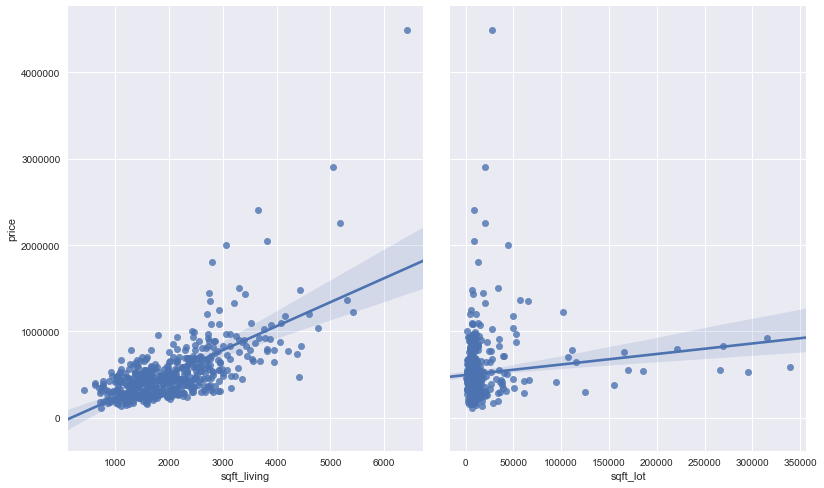

In [43]:
sns.pairplot(data,x_vars=['sqft_living','sqft_lot'],y_vars='price',size=7,aspect=0.8,kind='reg')
plt.show()

train linear regression model

1.split train data and test data

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(new_examDf.iloc[:,3:5],new_examDf.price,train_size=0.8)

In [45]:
print("independent variables:",new_examDf.iloc[:,3:5].shape,";  train data:",X_train.shape,";  test data:",X_test.shape)
print("dependent variables:",examDf.price.shape,";  train data:",Y_train.shape,";  test data:",Y_test.shape)

independent variables: (499, 2) ;  train data: (399, 2) ;  test data: (100, 2)
dependent variables: (499,) ;  train data: (399,) ;  test data: (100,)


In [46]:
model = LinearRegression()

In [47]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
t = model.intercept_
k = model.coef_
print("Fitting Parameters:Intercept",t,",coefficient:",k)

Fitting Parameters:Intercept -69041.8442301 ,coefficient: [ 296.90670608   -0.45787946]


In [49]:
print("best line:Y = ",np.round(t,2),"+",np.round(k[0],2),"*x1 +",round(k[1],2),"* x2")

best line:Y =  -69041.84 + 296.91 *x1 + -0.46 * x2


In [50]:
Y_pred = model.predict(X_test)

In [51]:
plt.plot(range(len(Y_pred)),Y_pred,'red',linewidth=2.5,label="predict data")
plt.plot(range(len(Y_test)),Y_test,'green',label = "test data")
plt.legend(loc=2)

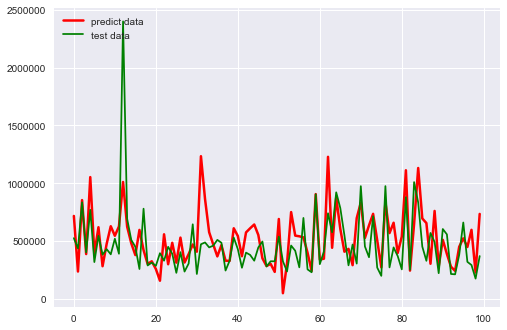

In [52]:
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np

In [54]:
mse = mean_squared_error(Y_test,Y_pred)
print(mse)

58868537571.2


In [55]:
rmse = np.sqrt(mse)
print(rmse)

242628.393992


In [56]:
mae = mean_absolute_error(Y_test,Y_pred)
print(mae)

167477.630394


In [57]:
r2 = r2_score(Y_test,Y_pred)
print(r2)

0.228392712612


In [58]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [70]:
print(knn.score(X_train,Y_train))
print(knn.score(X_test,Y_test))

0.195488721805
0.01


In [61]:
from sklearn.cross_validation import cross_val_score

In [62]:
scores = cross_val_score(knn,X_train,Y_train,cv=3,scoring='accuracy')

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


In [63]:
print(scores)

[ 0.00970874  0.          0.        ]


In [64]:
print(scores.mean())

0.00323624595469


In [65]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [67]:
print(knn.score(X_train,Y_train))

0.195488721805


In [68]:
scores = cross_val_score(knn,X_train,Y_train,cv=3,scoring="accuracy")
print(scores)

[ 0.00970874  0.          0.        ]


D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


In [69]:
print(scores.mean())

0.00323624595469
